In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv("dataset/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Checking for missing values
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

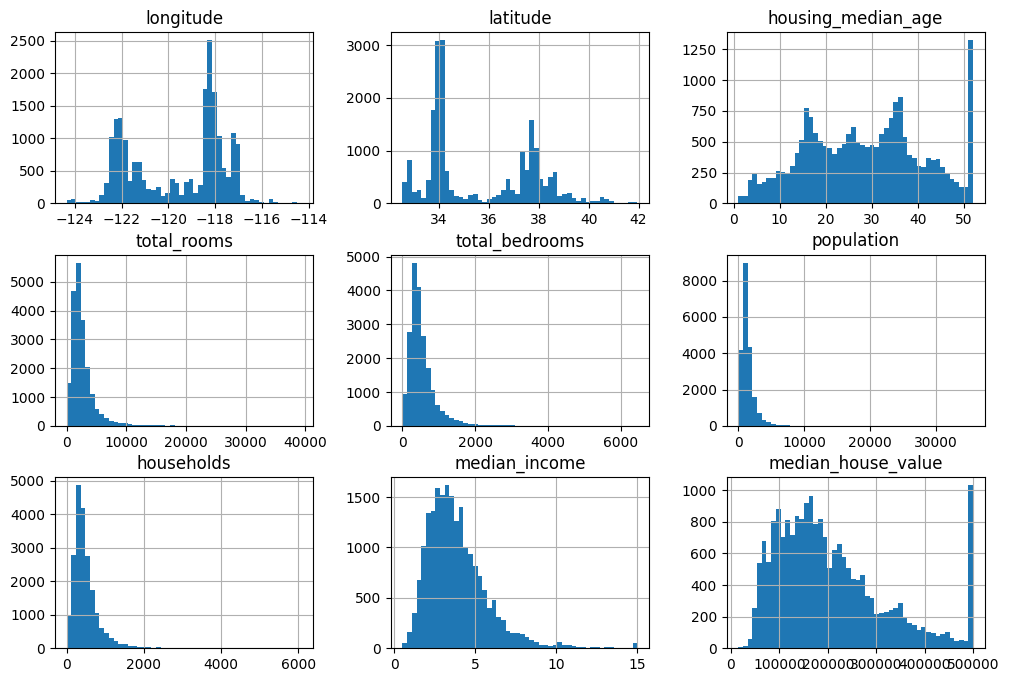

In [6]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [7]:
# Correlation Matrix
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


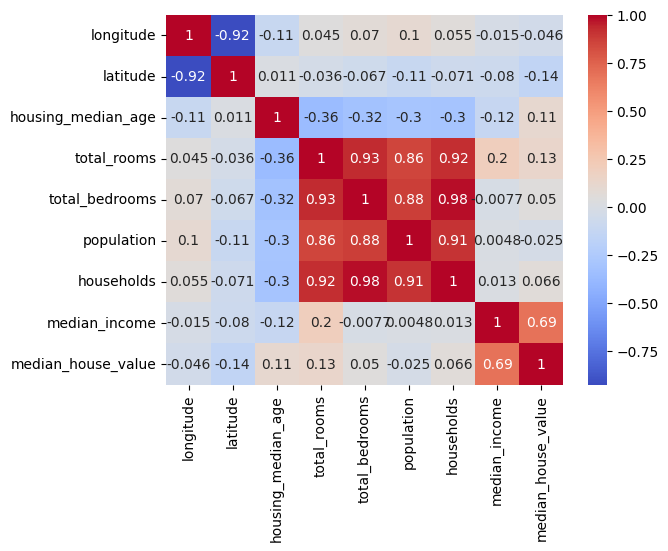

In [8]:
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

In [9]:
from pandas.plotting import scatter_matrix

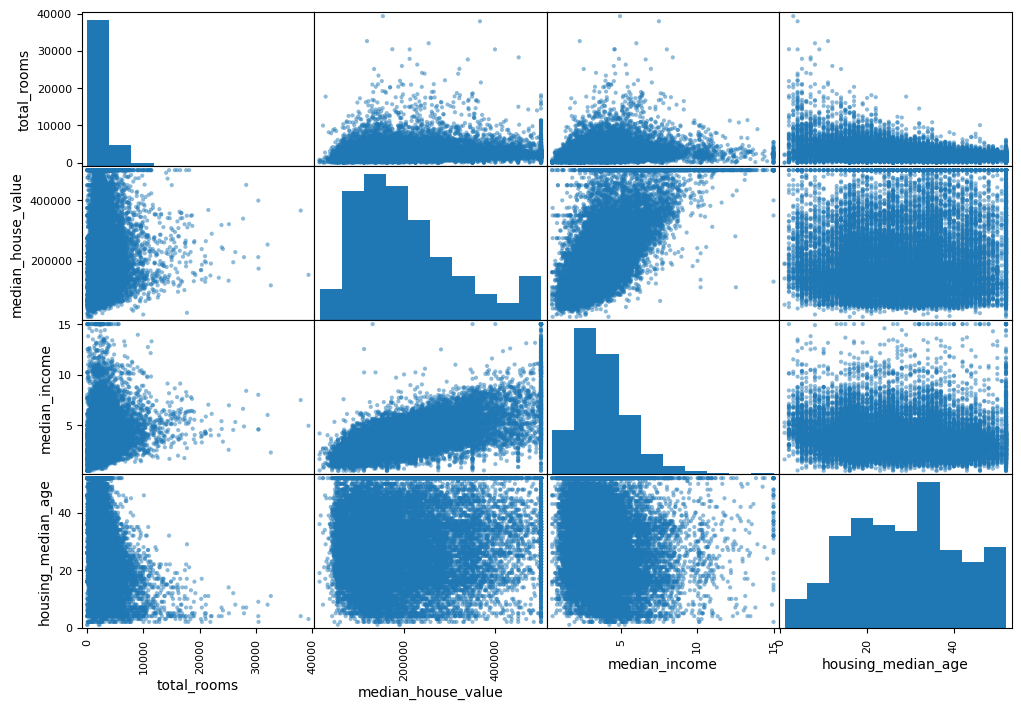

In [10]:
attributes = ["total_rooms", "median_house_value", "median_income", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

## Filling Missing Values

- **total_bedrooms** is highly correlated with **households** (0.98).
- Hence using **households** to fill in the missing values.
- Creating bins of size 20 for the **households** column.
- For each bin, calculating median of **total_bedrooms** falling in the same bin.
- Filling the missing value of **total_bedrooms** for that bin with the calculated median.

In [11]:
housing["households_binned"] = pd.cut(housing["households"], bins=range(0, int(housing["households"].max()), 20))

In [12]:
median_values = housing.groupby("households_binned")["total_bedrooms"].median()

/tmp/ipykernel_39318/2188773033.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = housing.groupby("households_binned")["total_bedrooms"].median()


In [13]:
median_values

households_binned
(0, 20]          11.0
(20, 40]         33.5
(40, 60]         57.5
(60, 80]         76.0
(80, 100]       102.0
                ...  
(5980, 6000]      NaN
(6000, 6020]      NaN
(6020, 6040]      NaN
(6040, 6060]      NaN
(6060, 6080]      NaN
Name: total_bedrooms, Length: 304, dtype: float64

In [14]:
housing["total_bedrooms"] = housing.apply(
    lambda row: median_values[row["households_binned"]] if pd.isna(row["total_bedrooms"]) else row["total_bedrooms"],
    axis=1
)

In [15]:
housing["total_bedrooms"].isna().sum()

np.int64(0)

<Axes: xlabel='total_bedrooms', ylabel='Count'>

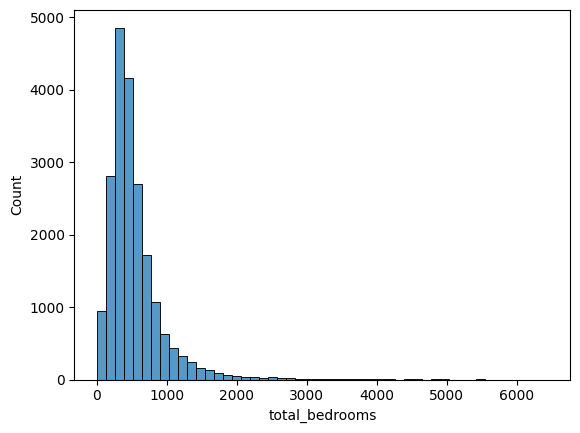

In [16]:
sns.histplot(housing["total_bedrooms"], bins=50)

## Geospatial Data and Ocean Proximity

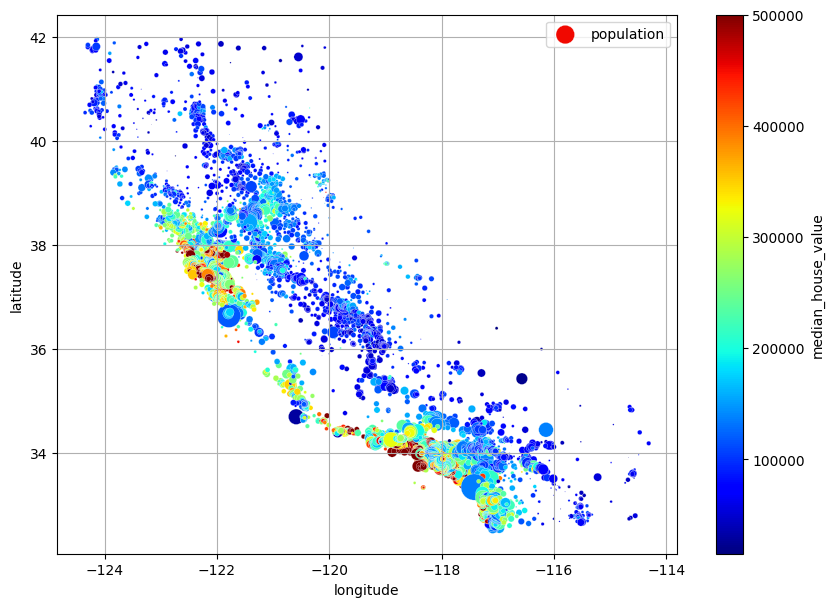

In [26]:
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(x="longitude", y="latitude", data=housing, c=housing["median_house_value"],
                          cmap="jet", label="population", s=housing["population"]/100)
plt.colorbar(scatter.collections[0], label="median_house_value")
plt.grid(True)
plt.show()